# Importing Required Modules

## General Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


## Modelling

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

## My modules

In [3]:
from my_modules.Predict import classification

# Functions

In [114]:
def text_classification(x, y, vect_model, pred_model, **kwargs):

    # Train/Test Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

    # Vectorization
    vect_model.fit(x_train)

    x_vect_train = vect_model.transform(x_train)
    y_vect_test = vect_model.transform(x_test)

    # Prediction
    output = classification(x_bow_train, y_train, x_bow_test, y_test, pred_model, **kwargs)

    return output

    

# Loading the data

In [5]:
path = "Data/IMDB_Dataset_processed.csv"
imdb_df = pd.read_csv(path)

# Building a Logistic Regression Model

In [6]:
y = imdb_df["sentiment"]
x = imdb_df["lemmas"]

lb = LabelBinarizer()
y = np.ravel(lb.fit_transform(y))


## Train/test Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [8]:
x_train

38414    ['notion', 'marital', 'fidelity', 'portray', '...
24010    ['good', 'film', 'man', 'great', 'action', 'mo...
29873    ['great', 'good', 'bit', 'goldeneye', 'final',...
2868     ['good', 'night', 'drama', 'show', 'long', 'ti...
15107    ['film', 'unbelievable', 'premise', 'bunkum', ...
                               ...                        
26219    ['film', 'beauty', 'surround', 'world', 'decay...
46599    ['total', 'disgrace', 'truly', 'awful', 'scree...
36788    ['gem', 'pen', 'fact', 'year', 'write', 'direc...
5038     ['see', 'movie', 'come', 'official', 'selectio...
6732     ['action', 'need', 'awsome', 'good', 'actually...
Name: lemmas, Length: 40000, dtype: object

In [9]:
x_test

24125    ['figure', 'movie', 'lady', 'go', 'good', 'act...
25498    ['thing', 'happen', 'ensemble', 'cast', 'bring...
22286    ['catch', 'time', 'tv', 'late', '1970', 'play'...
26283    ['maybe', 'happen', 'see', 'movie', 'maybe', '...
9209     ['see', 'cable', 'late', 'big', 'wrestling', '...
                               ...                        
34152    ['fact', 'complete', 'douche', 'bag', 'con', '...
45174    ['know', 'movie', 'unspeakably', 'bad', 'laugh...
36911    ['big', 'disappointment', 'tout', 'incredible'...
36332    ['avid', 'viewer', 'occasionally', 'episode', ...
4844     ['see', 'movie', 'theatre', 'terrible', 'movie...
Name: lemmas, Length: 10000, dtype: object

## Vectorization - Bag of Words

In [10]:
cv = CountVectorizer()

In [11]:
cv.fit(x_train)

x_bow_train = cv.transform(x_train)
x_bow_test = cv.transform(x_test)

print(f'x_bow_train: {x_bow_train.shape}')
print(f'x_bow_test: {x_bow_test.shape}')

x_bow_train: (40000, 43484)
x_bow_test: (10000, 43484)


In [41]:
x_bow_train_df = pd.DataFrame(x_bow_test.toarray(), columns=cv.get_feature_names())

C:\Users\user\miniconda3\envs\DA_ENV\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Top 100 more frequent lemmas in the IMDb train corpus

In [71]:
list_tuples = []

for column in x_bow_train_df.columns:

    list_tuples.append((column, x_bow_train_df[column].sum()))

In [72]:
list_tuples.sort(key=lambda tup:tup[1], reverse=True)
print(list_tuples[0:100])

[('movie', 20413), ('film', 18846), ('good', 8147), ('time', 6261), ('character', 5707), ('watch', 5624), ('bad', 5254), ('story', 4929), ('see', 4856), ('think', 4797), ('scene', 4295), ('know', 3943), ('great', 3901), ('look', 3807), ('people', 3668), ('go', 3534), ('play', 3468), ('love', 3346), ('way', 3342), ('come', 3320), ('thing', 3256), ('find', 3143), ('end', 3051), ('work', 2822), ('get', 2818), ('life', 2759), ('want', 2724), ('actor', 2713), ('plot', 2669), ('make', 2621), ('man', 2621), ('year', 2582), ('well', 2532), ('like', 2483), ('little', 2472), ('try', 2448), ('feel', 2206), ('give', 2174), ('take', 2161), ('funny', 2019), ('old', 1905), ('real', 1877), ('lot', 1852), ('performance', 1851), ('show', 1848), ('acting', 1812), ('director', 1783), ('guy', 1781), ('actually', 1719), ('tell', 1699), ('act', 1694), ('leave', 1691), ('role', 1686), ('say', 1660), ('start', 1631), ('woman', 1617), ('point', 1605), ('big', 1585), ('cast', 1582), ('long', 1528), ('day', 1493)

## Vectorization - TF - IDF

In [33]:
tfidf = TfidfVectorizer()

In [34]:
tfidf.fit(x_train)

x_tfidf_train = tfidf.transform(x_train)
x_tfidf_test = tfidf.transform(x_test)

print(f'x_tfidf_train: {x_bow_train.shape}')
print(f'x_tfidf_test: {x_bow_test.shape}')

x_tfidf_train: (40000, 43484)
x_tfidf_test: (10000, 43484)


## Classification Model

In [12]:
lr=LogisticRegression(max_iter=500, random_state=0)

In [13]:
lr.fit(x_bow_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

In [14]:
y_pred_train = lr.predict(x_bow_train)
y_pred_test = lr.predict(x_bow_test)

In [15]:
accuracy_score(y_test, y_pred_test)

0.8713

In [16]:
accuracy_score(y_train, y_pred_train)

0.9773

-----------------
The model score using K-fold cross validation (k=5) is 0.87 with a standard deviation of 0.003
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.869550,-
val_std (k=5),0.002565,-
accuracy,0.977300,0.8713
precision,0.975588,0.864806
recall,0.979100,0.8802


-----------------
Confusion matrix for the train set
-----------------


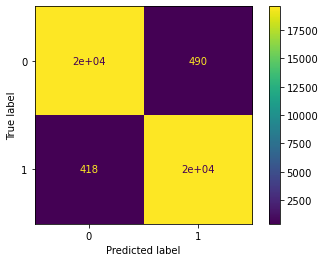

Confusion matrix for the test set
-----------------


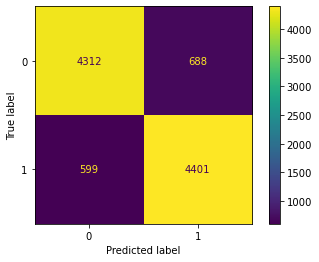

In [19]:
output_lr = classification(x_bow_train, y_train, x_bow_test, y_test, lr, cv=5, pos_label=1, verbose=True, plot=True)

# A flexible function for text classification

## Random Forest

In [76]:
rf=RandomForestClassifier(max_depth=20, n_estimators=100, random_state=0)

### Bag of Words - raw text

-----------------
The model score using K-fold cross validation (k=5) is 0.84 with a standard deviation of 0.003
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.840225,-
val_std (k=5),0.002820,-
accuracy,0.898150,0.8419
precision,0.872242,0.822608
recall,0.932950,0.8718


-----------------
Confusion matrix for the train set
-----------------


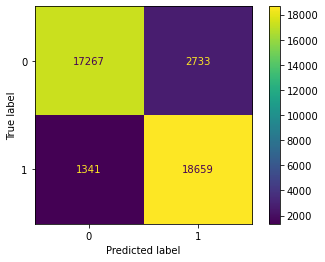

Confusion matrix for the test set
-----------------


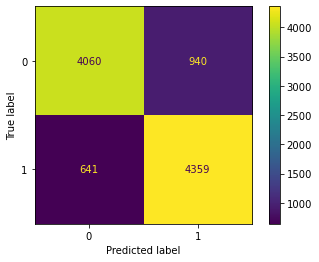

In [77]:
output_rf_bow_raw = text_classification(imdb_df["review"], y, CountVectorizer(), rf, cv=5)

### Bag of Words - Lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.84 with a standard deviation of 0.003
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.840225,-
val_std (k=5),0.002820,-
accuracy,0.898150,0.8419
precision,0.872242,0.822608
recall,0.932950,0.8718


-----------------
Confusion matrix for the train set
-----------------


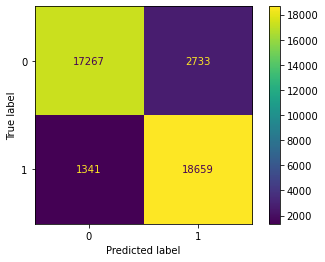

Confusion matrix for the test set
-----------------


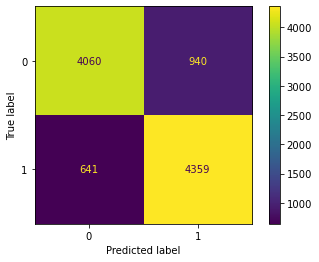

In [78]:
output_rf_bow_lemmas = text_classification(imdb_df["lemmas"], y, CountVectorizer(), rf, cv=5)

### Bag of Words - ngrams

-----------------
The model score using K-fold cross validation (k=5) is 0.84 with a standard deviation of 0.003
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.840225,-
val_std (k=5),0.002820,-
accuracy,0.898150,0.8419
precision,0.872242,0.822608
recall,0.932950,0.8718


-----------------
Confusion matrix for the train set
-----------------


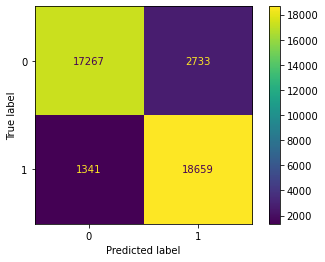

Confusion matrix for the test set
-----------------


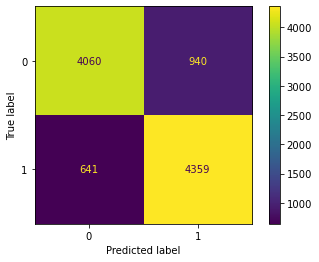

In [79]:
output_rf_bow_ngrams = text_classification(imdb_df["ngrams"], y, CountVectorizer(), rf, cv=5)

### TF_IDF - Lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.84 with a standard deviation of 0.003
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.840225,-
val_std (k=5),0.002820,-
accuracy,0.898150,0.8419
precision,0.872242,0.822608
recall,0.932950,0.8718


-----------------
Confusion matrix for the train set
-----------------


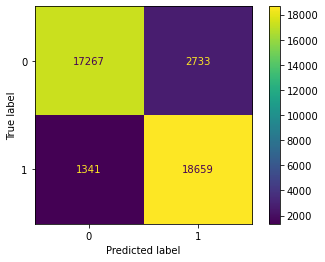

Confusion matrix for the test set
-----------------


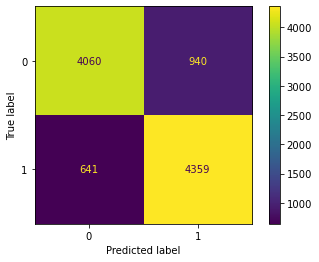

In [80]:
output_rf_tfidf_lemmas = text_classification(imdb_df["lemmas"], y, TfidfVectorizer(), rf, cv=5)

## SVM

In [93]:
svm = LinearSVC(random_state=0, tol=1e-2, max_iter=5000)

### Bag of Words - Lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.843 with a standard deviation of 0.005
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.843050,-
val_std (k=5),0.004974,-
accuracy,0.997100,0.8467
precision,0.996852,0.843608
recall,0.997350,0.8512


-----------------
Confusion matrix for the train set
-----------------


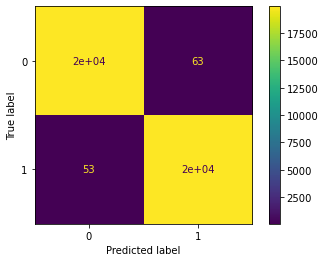

Confusion matrix for the test set
-----------------


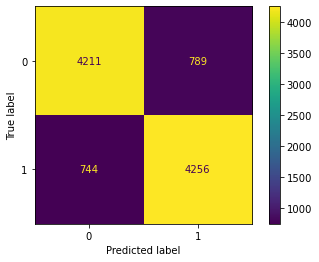

In [94]:
output_svm_bow_lemmas = text_classification(imdb_df["lemmas"], y, CountVectorizer(), svm, cv=5)

### Bag of Words - ngrams

-----------------
The model score using K-fold cross validation (k=5) is 0.843 with a standard deviation of 0.005
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.843050,-
val_std (k=5),0.004974,-
accuracy,0.997100,0.8467
precision,0.996852,0.843608
recall,0.997350,0.8512


-----------------
Confusion matrix for the train set
-----------------


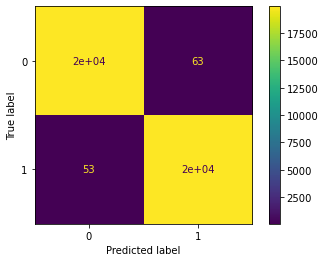

Confusion matrix for the test set
-----------------


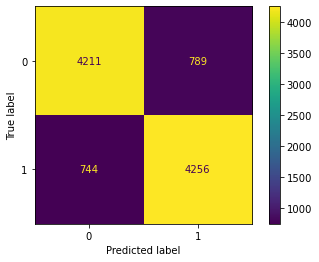

In [107]:
output_svm_bow_ngrams = text_classification(imdb_df["ngrams"], y, CountVectorizer(), svm, cv=5)

### TF_ITF - lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.843 with a standard deviation of 0.005
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.843050,-
val_std (k=5),0.004974,-
accuracy,0.997100,0.8467
precision,0.996852,0.843608
recall,0.997350,0.8512


-----------------
Confusion matrix for the train set
-----------------


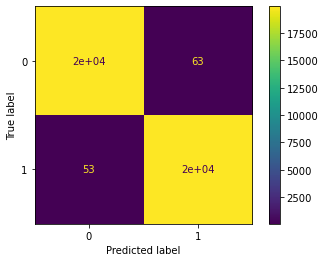

Confusion matrix for the test set
-----------------


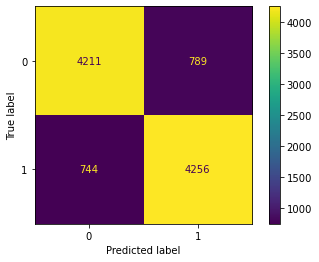

In [106]:
output_svm_tfif_lemmas = text_classification(imdb_df["lemmas"], y, TfidfVectorizer(), svm, cv=5)

## Naive Bayes

In [100]:
nb = MultinomialNB()

### Bag of Words - Lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.855 with a standard deviation of 0.004
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.855025,-
val_std (k=5),0.004340,-
accuracy,0.885200,0.8559
precision,0.890669,0.858987
recall,0.878200,0.8516


-----------------
Confusion matrix for the train set
-----------------


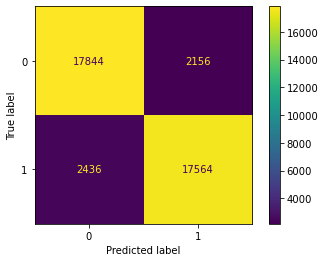

Confusion matrix for the test set
-----------------


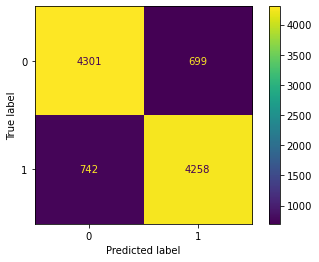

In [101]:
output_nb_bow_lemmas = text_classification(imdb_df["lemmas"], y, CountVectorizer(), nb, cv=5)

### Bag of Words - ngrams

-----------------
The model score using K-fold cross validation (k=5) is 0.855 with a standard deviation of 0.004
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.855025,-
val_std (k=5),0.004340,-
accuracy,0.885200,0.8559
precision,0.890669,0.858987
recall,0.878200,0.8516


-----------------
Confusion matrix for the train set
-----------------


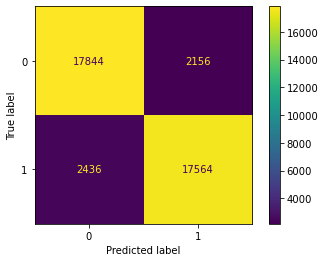

Confusion matrix for the test set
-----------------


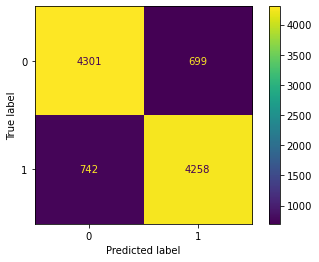

In [104]:
output_nb_bow_ngrams = text_classification(imdb_df["ngrams"], y, CountVectorizer(), nb, cv=5)

### TF_ITF - lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.855 with a standard deviation of 0.004
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.855025,-
val_std (k=5),0.004340,-
accuracy,0.885200,0.8559
precision,0.890669,0.858987
recall,0.878200,0.8516


-----------------
Confusion matrix for the train set
-----------------


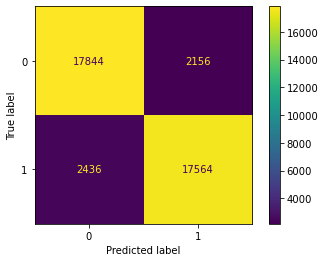

Confusion matrix for the test set
-----------------


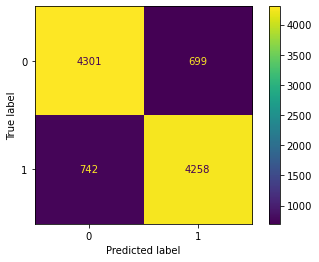

In [103]:
output_nb_tfif_lemmas = text_classification(imdb_df["lemmas"], y, TfidfVectorizer(), nb, cv=5)

# Final Model - Naive Bayes with Bag of Words and lemmas

-----------------
The model score using K-fold cross validation (k=5) is 0.855 with a standard deviation of 0.004
-----------------
The performance metrics of the model


,train,test
error_metric,,
val_mean_score (k=5),0.855025,-
val_std (k=5),0.004340,-
accuracy,0.885200,0.8559
precision,0.890669,0.858987
recall,0.878200,0.8516


-----------------
Confusion matrix for the train set
-----------------


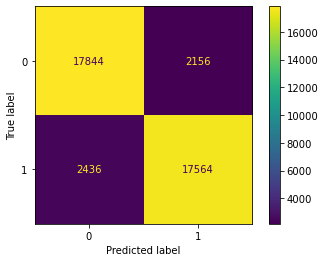

Confusion matrix for the test set
-----------------


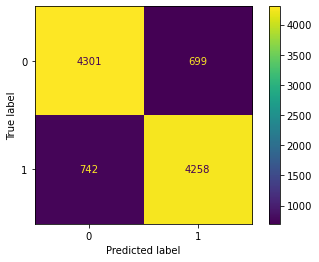

In [115]:
nb = MultinomialNB()
output_nb_bow_lemmas = text_classification(imdb_df["lemmas"], y, CountVectorizer(), nb, cv=5)

In [116]:
output_nb_bow_lemmas.keys()

dict_keys(['model', 'val_scores', 'prediction_results', 'performance_metrics'])

In [117]:
output_nb_bow_lemmas["prediction_results"]

,train,test
y,"[1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, ..."
y_pred,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, ...","[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, ..."


In [118]:
y_pred_test = output_nb_bow_lemmas["prediction_results"].loc["y_pred", "test"]

In [119]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5000
           1       0.86      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

